# Projet de cursus : Système Anti-Malware 
### Une approche utilisant la combinaisaon de modèles de deep learning et de machine learning pour la classification des malwares

**Auteurs :** M. Gosselin, Y. Emeriau, P. Ledermann, T. Boussin

**Classe :** 5CDI

**Année académique :** 2023-2024



Basé sur le papier de recherche : 

"Towards Building an Intelligent Anti-Malware System: A Deep Learning Approach using Support Vector Machine (SVM) for Malware Classification
Abien Fred M. Agarap"

## Partie 3 : Essai d'un modèle hybride : GRU-SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Charger le fichier NPZ
data = np.load('images_malware.npz', allow_pickle=True)

# Afficher les clés disponibles dans le fichier NPZ
print("Clés disponibles dans le fichier NPZ :", list(data.keys()))

# Afficher les valeurs associées à chaque clé
for key in data.keys():
    print(f"Clé : {key}")
    print(data[key])  # Afficher la valeur associée à la clé

Clés disponibles dans le fichier NPZ : ['arr']
Clé : arr
[[array([[  0,   0,   0, ...,   0,   0,   0],
         [ 24,   0,  69, ...,   0, 144, 255],
         [232, 242, 251, ..., 235, 139,   0],
         ...,
         [ 88, 124, 124, ...,  95,  92,  56],
         [ 27, 243, 250, ..., 250, 243, 243],
         [115,  48, 129, ..., 199,  23, 252]], dtype=uint8) 0]
 [array([[  0,   0,   0, ...,   0,   0,   0],
         [ 24,   0,  69, ...,   0, 144, 255],
         [139, 139, 209, ..., 139,   2, 196],
         ...,
         [ 35,  44,  40, ...,  88, 124,  37],
         [233, 248, 134, ...,  27,  32, 247],
         [134,  19, 252, ..., 137, 176,  43]], dtype=uint8) 0]
 [array([[  0,   0,   0, ...,   0,   0,   0],
         [ 24,   0,  69, ...,   0, 144, 255],
         [232, 242, 251, ..., 235, 139,   0],
         ...,
         [ 88, 124, 124, ...,  95,  92,  56],
         [ 27, 243, 250, ..., 250, 243, 243],
         [115,  48, 129, ..., 199,  23, 252]], dtype=uint8) 0]
 ...
 [array([[  0,  8

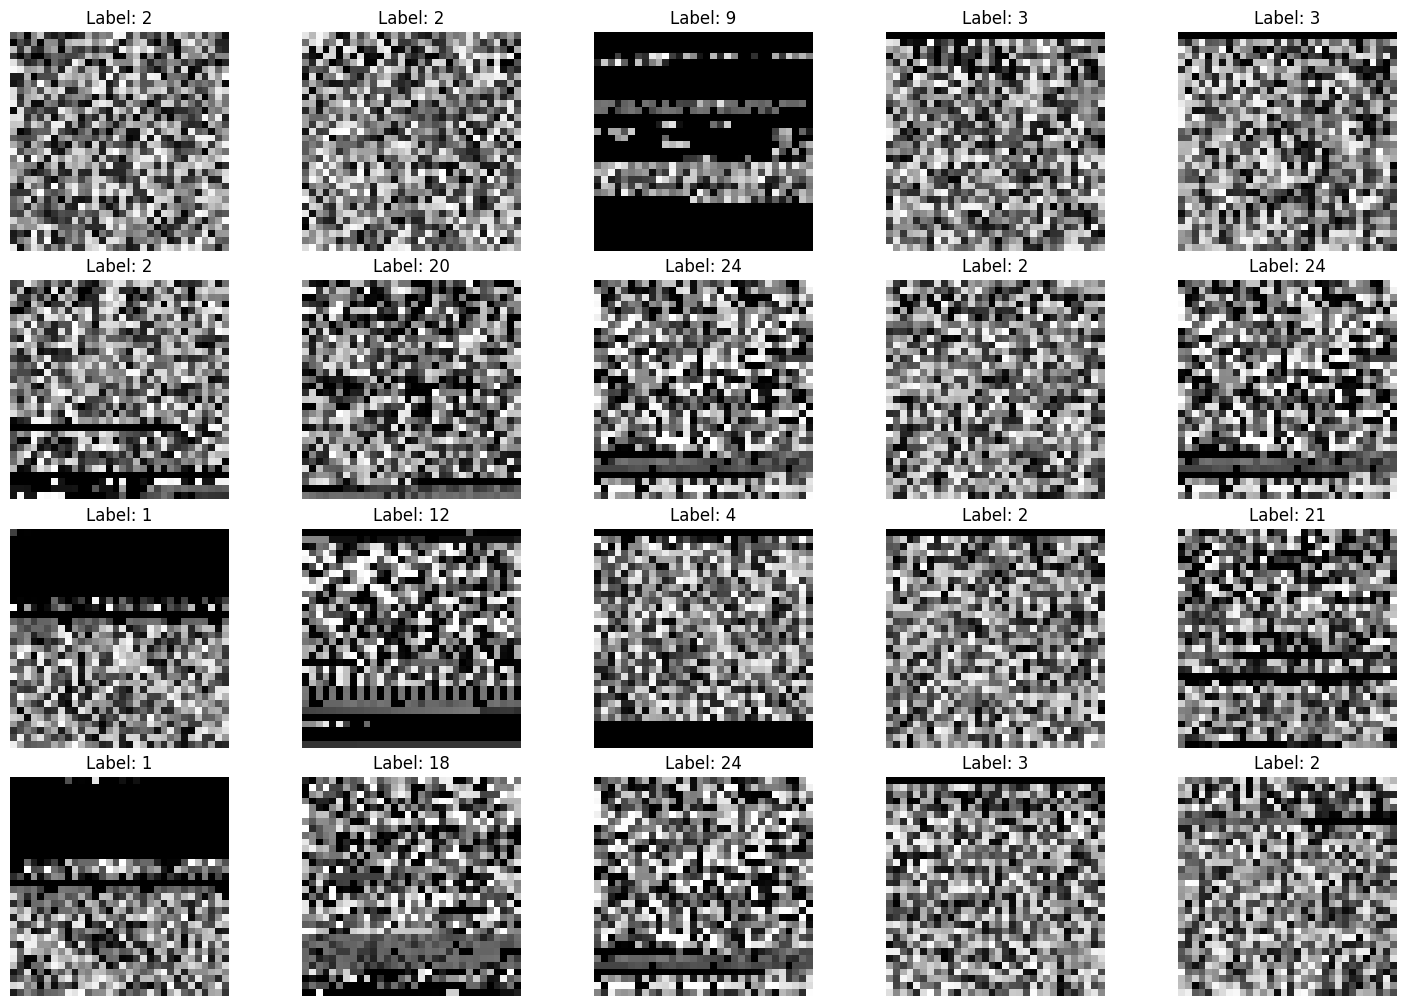

In [3]:
# Récupérer les données
images = data['arr'][:, 0]  # Supposons que les images sont dans la première colonne
labels = data['arr'][:, 1]  # Supposons que les étiquettes sont dans la deuxième colonne

# Nombre total d'images dans le dataset
total_images = len(images)

# Sélectionner 20 indices au hasard
random_indices = np.random.choice(total_images, size=20, replace=False)

# Afficher les images sélectionnées aléatoirement avec leurs étiquettes
num_images_per_row = 5
num_rows = (len(random_indices) - 1) // num_images_per_row + 1

plt.figure(figsize=(15, 10))  # Taille de la figure

for i, idx in enumerate(random_indices):
    plt.subplot(num_rows, num_images_per_row, i + 1)
    plt.imshow(images[idx], cmap='gray')  # Affichage en nuances de gris
    plt.title(f'Label: {labels[idx]}')
    plt.axis('off')  # Désactiver les axes

plt.tight_layout(pad=0.5)  # Ajuster la disposition pour un espacement optimal
plt.show()

In [4]:
# Charger les données
data = np.load('images_malware.npz', allow_pickle=True)
images_labels = data['arr']

# Séparer les images et les étiquettes
images = []
labels = []
for img, label in images_labels:
    images.append(img)
    labels.append(label)

# Convertir en tableaux NumPy
images = np.array(images)
labels = np.array(labels)

# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
images, test_images, labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Conversion des images en tenseurs PyTorch
images_tensor = torch.from_numpy(images).float()
labels_tensor = torch.from_numpy(labels).long()

# Correction : Convertir les données de test en tenseurs PyTorch
test_images_tensor = torch.from_numpy(test_images).float()
test_labels_tensor = torch.from_numpy(test_labels).long()

print("Data Type Image Tensor :", images_tensor.dtype)
print("Data Type Label Tensor :", labels_tensor.dtype)
print("Data Shape Image Tensor :", images_tensor.shape)
print("Data Shape Label Tensor :", labels_tensor.shape)

# Vérifier les données de test
print("Data Type Test Image Tensor :", test_images_tensor.dtype)
print("Data Type Test Label Tensor :", test_labels_tensor.dtype)
print("Data Shape Test Image Tensor :", test_images_tensor.shape)
print("Data Shape Test Label Tensor :", test_labels_tensor.shape)


Data Type Image Tensor : torch.float32
Data Type Label Tensor : torch.int64
Data Shape Image Tensor : torch.Size([7471, 32, 32])
Data Shape Label Tensor : torch.Size([7471])
Data Type Test Image Tensor : torch.float32
Data Type Test Label Tensor : torch.int64
Data Shape Test Image Tensor : torch.Size([1868, 32, 32])
Data Shape Test Label Tensor : torch.Size([1868])


In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Load the malware dataset
data = np.load('images_malware.npz', allow_pickle=True)
images_labels = data['arr']

# Separate images and labels
images = []
labels = []
for img, label in images_labels:
    images.append(img)
    labels.append(label)

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
images, test_images, labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.from_numpy(images).float()
y_train = torch.from_numpy(labels).long()
X_val = torch.from_numpy(test_images).float()
y_val = torch.from_numpy(test_labels).long()

# Create TensorDatasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoaders
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, bidirectional=False):
        super(GRUModel, self).__init__()

        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            bidirectional=bidirectional,
            batch_first=True
        )

        if bidirectional:
            self.fc = nn.Linear(hidden_size * 2, output_size)
        else:
            self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]  # Take the output from the last time step
        out = self.fc(out)
        return out

# Instantiate the GRU model
input_size = images.shape[2]  # Assuming the third dimension is the input size
hidden_size = 64  # You can experiment with different sizes
output_size = 25  # Assuming you have 25 classes, adjust as needed
gru_model = GRUModel(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gru_model.parameters(), lr=1e-3)

# Training loop with validation
num_epochs = 5
for epoch in range(num_epochs):
    gru_model.train()
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        # Ensure the input size matches the expected input size for the model
        inputs = inputs.permute(0, 2, 1)  # Permute dimensions
        
        outputs = gru_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {running_loss / len(train_loader)}')

    # Validation loop
    gru_model.eval()
    with torch.no_grad():
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        for val_data in val_loader:
            val_inputs, val_labels = val_data
            val_inputs = val_inputs.permute(0, 2, 1)  # Permute dimensions
            val_outputs = gru_model(val_inputs)
            val_loss += criterion(val_outputs, val_labels).item()

            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = val_correct / val_total
        print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}')


Epoch [1/5], Training Loss: 2.4766501983006797
Epoch [1/5], Validation Loss: 2.1322867572307587, Validation Accuracy: 0.3158458244111349
Epoch [2/5], Training Loss: 2.012172043323517
Epoch [2/5], Validation Loss: 1.8748641163110733, Validation Accuracy: 0.46359743040685225
Epoch [3/5], Training Loss: 1.7723190625508627
Epoch [3/5], Validation Loss: 1.6688664704561234, Validation Accuracy: 0.5112419700214133
Epoch [4/5], Training Loss: 1.5995635072390237
Epoch [4/5], Validation Loss: 1.5090272575616837, Validation Accuracy: 0.5551391862955032
Epoch [5/5], Training Loss: 1.447024897734324
Epoch [5/5], Validation Loss: 1.3646703958511353, Validation Accuracy: 0.6118843683083511


Epoch [1/15], Training Loss: 2.4247882604599
Epoch [1/15], Validation Loss: 2.0643500983715057, Validation Accuracy: 0.41167023554603854
Epoch [2/15], Training Loss: 1.8915422479311625
Epoch [2/15], Validation Loss: 1.6311562955379486, Validation Accuracy: 0.5422912205567452
Epoch [3/15], Training Loss: 1.468568245569865
Epoch [3/15], Validation Loss: 1.244315281510353, Validation Accuracy: 0.6600642398286938
Epoch [4/15], Training Loss: 1.128080423672994
Epoch [4/15], Validation Loss: 1.000485174357891, Validation Accuracy: 0.711456102783726
Epoch [5/15], Training Loss: 0.9285796284675598
Epoch [5/15], Validation Loss: 0.8695968091487885, Validation Accuracy: 0.734475374732334
Epoch [6/15], Training Loss: 0.8215932706991832
Epoch [6/15], Validation Loss: 0.7983292117714882, Validation Accuracy: 0.7457173447537473
Epoch [7/15], Training Loss: 0.750595913330714
Epoch [7/15], Validation Loss: 0.7261939942836761, Validation Accuracy: 0.7585653104925053
Epoch [8/15], Training Loss: 0.67544

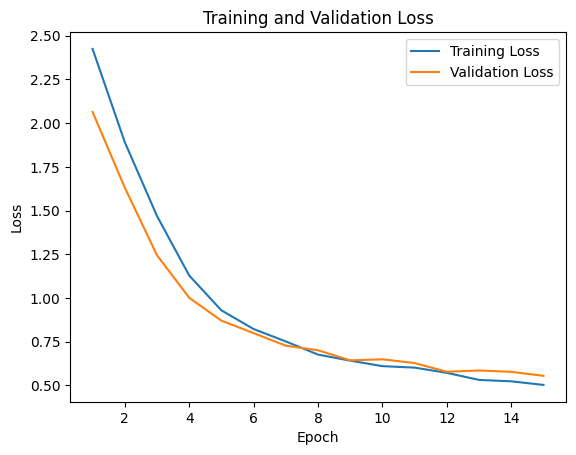

In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

list_train_losses = []  # List of training losses for each epoch
list_val_losses = [] 
# Load the malware dataset
data = np.load('images_malware.npz', allow_pickle=True)
images_labels = data['arr']

# Separate images and labels
images = []
labels = []
for img, label in images_labels:
    images.append(img)
    labels.append(label)

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
images, test_images, labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.from_numpy(images).float()
y_train = torch.from_numpy(labels).long()
X_val = torch.from_numpy(test_images).float()
y_val = torch.from_numpy(test_labels).long()

# Create TensorDatasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoaders
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Hyperparameters
input_size = images.shape[2]  # Assuming the third dimension is the input size
output_size = 25  # Assuming you have 25 classes, adjust as needed

# Experiment with different hyperparameter values
learning_rate = 1e-3
hidden_size = 64
num_layers = 2
bidirectional = False

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self):
        super(GRUModel, self).__init__()

        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            bidirectional=bidirectional,
            batch_first=True
        )

        if bidirectional:
            self.fc = nn.Linear(hidden_size * 2, output_size)
        else:
            self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]  # Take the output from the last time step
        out = self.fc(out)
        return out


dataset = TensorDataset(images_tensor, labels_tensor)

# DataLoader
batch_size = 256
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


# Instantiate the GRU model
gru_model = GRUModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gru_model.parameters(), lr=learning_rate)

# Training loop
num_epochs = 15
for epoch in range(num_epochs):
    gru_model.train()
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        # Ensure the input size matches the expected input size for the model
        inputs = inputs.permute(0, 2, 1)  # Permute dimensions
        
        outputs = gru_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    # Store the training loss for the epoch
    list_train_losses.append(running_loss / len(train_loader))

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {list_train_losses[-1]}')

    # Validation loop
    gru_model.eval()
    with torch.no_grad():
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        for val_data in val_loader:
            val_inputs, val_labels = val_data
            val_inputs = val_inputs.permute(0, 2, 1)  # Permute dimensions
            val_outputs = gru_model(val_inputs)
            val_loss += criterion(val_outputs, val_labels).item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = val_correct / val_total

        # Store the validation loss for the epoch
        list_val_losses.append(avg_val_loss)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}')

# Save the trained model
torch.save(gru_model.state_dict(), 'trained_gru_model.pth')

# Plot the training and validation losses
plt.plot(range(1, num_epochs + 1), list_train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), list_val_losses, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
from sklearn.svm import SVC
import torch

# Récupérer les embeddings des images après la première couche FC
def get_embeddings(model, data_loader):
    model.eval()
    embeddings = []
    targets = []
    with torch.no_grad():
        for i, data in enumerate(data_loader, 0):
            inputs, labels = data
            # Remove the unsqueeze(1) operation
            outputs = model(inputs)
            # Aplatir les embeddings pour les rendre compatibles avec le SVM
            embeddings.extend(outputs.view(outputs.size(0), -1).cpu().numpy())
            targets.extend(labels.cpu().numpy())
    return embeddings, targets

# Obtenir les embeddings
embeddings, targets = get_embeddings(gru_model, data_loader)

# Entraîner le SVM
svm = SVC(C=10, kernel='linear')
svm.fit(embeddings, targets)


SVC(C=10, kernel='linear')

In [19]:
# Créer un TensorDataset pour les données de test
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

# DataLoader pour les données de test
test_batch_size = 256
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

# Obtenir les embeddings des données de test
test_embeddings, test_targets = get_embeddings(gru_model, test_loader)

# Faire des prédictions sur les données de test avec le SVM
svm_predictions = svm.predict(test_embeddings)

# Calculer la précision
accuracy = accuracy_score(test_targets, svm_predictions)
print(f"Précision du SVM sur les données de test : {accuracy}")

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(test_targets, svm_predictions))

Précision du SVM sur les données de test : 0.6167023554603854
Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        36
           1       0.39      0.58      0.47        19
           2       0.51      0.96      0.66       592
           3       0.00      0.00      0.00       310
           4       0.85      0.89      0.87        45
           5       1.00      1.00      1.00        18
           6       0.00      0.00      0.00        34
           7       0.00      0.00      0.00        27
           8       0.80      0.76      0.78        49
           9       1.00      0.97      0.99        34
          10       0.86      0.88      0.87        69
          11       0.70      0.18      0.29        89
          12       0.97      0.86      0.91        37
          13       0.93      0.90      0.91        41
          14       0.76      0.57      0.65        23
          15       0.00      0.00      0.00  

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La combinaison du GRU + SVM donne de mauvais résultats. Le GRU simple donnait une meilleure accuracy.

Pour conclure sur le projet, le modèle hybride CNN+SVM fût très performant et pourrait très bien être utilisé dans un cas réel. Nous notons la particularité de clasifier des binaires à partir d'image est très prometteur car n'importe quel fichier binaire peut être transformer sous forme d'image.